<a href="https://colab.research.google.com/github/Vedarham/XLearnings01/blob/main/Feature_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")
print(os.listdir(path))

Using Colab cache for faster access to the 'titanic-dataset' dataset.
['Titanic-Dataset.csv']


In [ ]:
df = pd.read_csv(os.path.join(path,'Titanic-Dataset.csv'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.fillna(df['Age'].mean(),inplace =True)

In [ ]:
X = df.iloc[:,[5,9]]
Y = df.iloc[:,1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

/tmp/ipython-input-2743222372.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


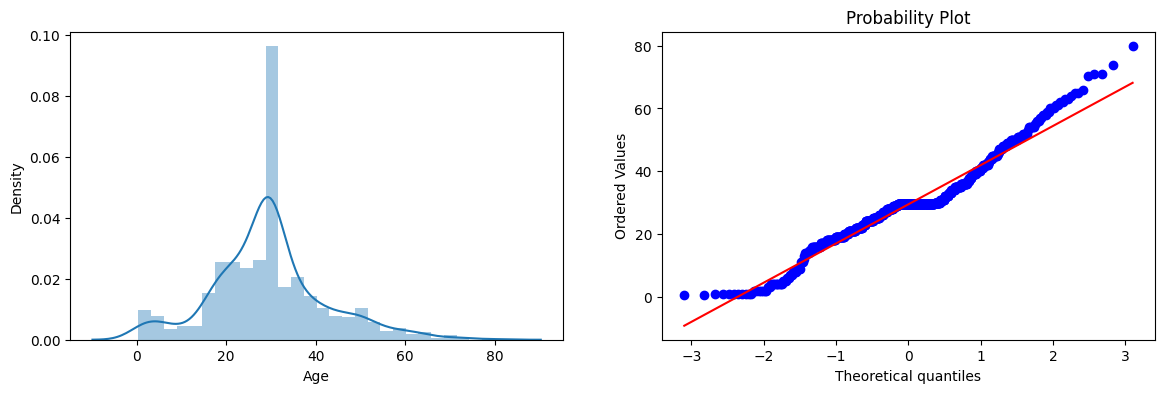

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])

plt.subplot(122)
stats.probplot(x_train['Age'], dist = 'norm', plot =plt)

plt.show()

/tmp/ipython-input-401592523.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


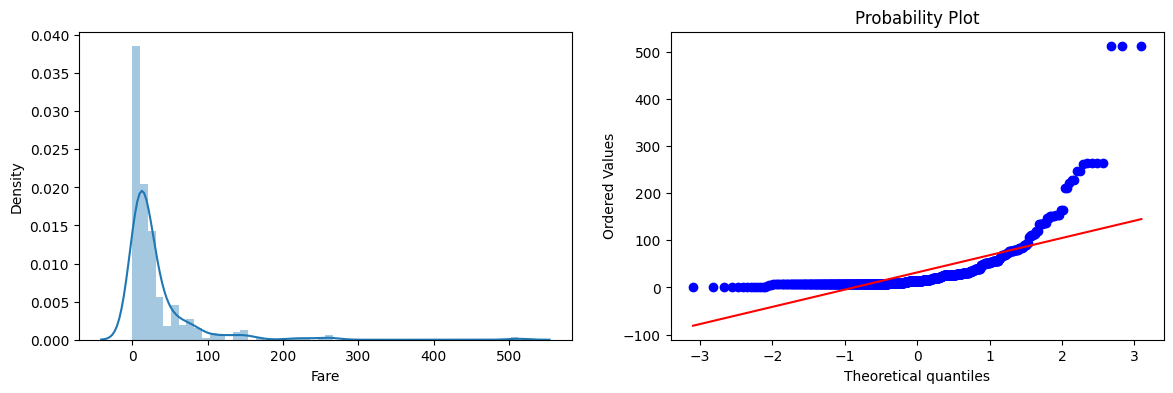

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])

plt.subplot(122)
stats.probplot(x_train['Fare'], dist = 'norm', plot =plt)

plt.show()

## Function Transformer

#### Accuracy without Feature Transformation

In [ ]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [ ]:
clf.fit(x_train, y_train)
clf1.fit(x_train,y_train)

ypred = clf.predict(x_test)
ypred1 = clf1.predict(x_test)

print(f'Accuracy LR', accuracy_score(y_test, ypred))
print(f'Accuracy DT', accuracy_score(y_test, ypred1))

Accuracy LR 0.659217877094972
Accuracy DT 0.659217877094972


#### Accuracy After Log Transformation

In [ ]:
x_train

,Age,Fare
53,29.000000,26.0000
611,29.699118,7.0500
239,33.000000,12.2750
784,25.000000,7.0500
453,49.000000,89.1042
...,...,...
647,56.000000,35.5000
36,29.699118,7.2292
367,29.699118,7.2292
630,80.000000,30.0000


In [ ]:
ftnf1 = FunctionTransformer(func = np.log1p)

In [ ]:
x_train_transformed = ftnf1.fit_transform(x_train)
x_test_transformed = ftnf1.transform(x_test)

In [ ]:
x_train_transformed.head()

,Age,Fare
53,3.401197,3.295837
611,3.424234,2.085672
239,3.526361,2.585883
784,3.258097,2.085672
453,3.912023,4.500967


/tmp/ipython-input-3140035945.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed['Age'])


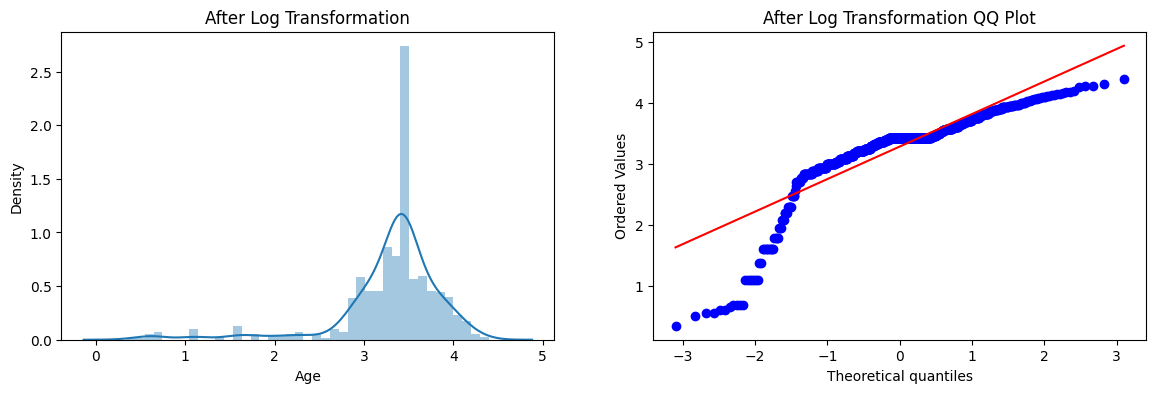

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train_transformed['Age'])
plt.title('After Log Transformation')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist = 'norm', plot =plt)
plt.title('After Log Transformation QQ Plot')
plt.show()

/tmp/ipython-input-2482126710.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed['Fare'])


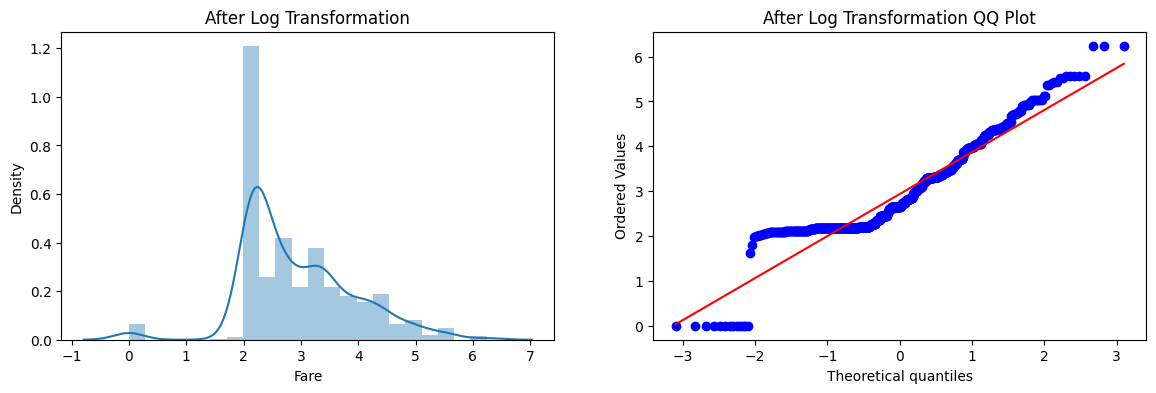

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train_transformed['Fare'])
plt.title('After Log Transformation')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist = 'norm', plot =plt)
plt.title('After Log Transformation QQ Plot')
plt.show()

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed, y_train)
clf1.fit(x_train_transformed, y_train)

ypredi = clf.predict(x_test_transformed)
ypredi1 = clf1.predict(x_test_transformed)

print(f'Accuracy LR', accuracy_score(y_test, ypredi))
print(f'Accuracy DT', accuracy_score(y_test, ypredi1))

Accuracy LR 0.7039106145251397
Accuracy DT 0.664804469273743


##### A More Reliable way to check is taking mean of results after performing series of splits
##### It is done by `Cross_val_score()`

In [ ]:
x_transformed = ftnf1.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf, x_transformed, Y, scoring = 'accuracy', cv =10)))
print('LR',np.mean(cross_val_score(clf1, x_transformed, Y, scoring = 'accuracy', cv =10)))

LR 0.678027465667915
LR 0.6577278401997504


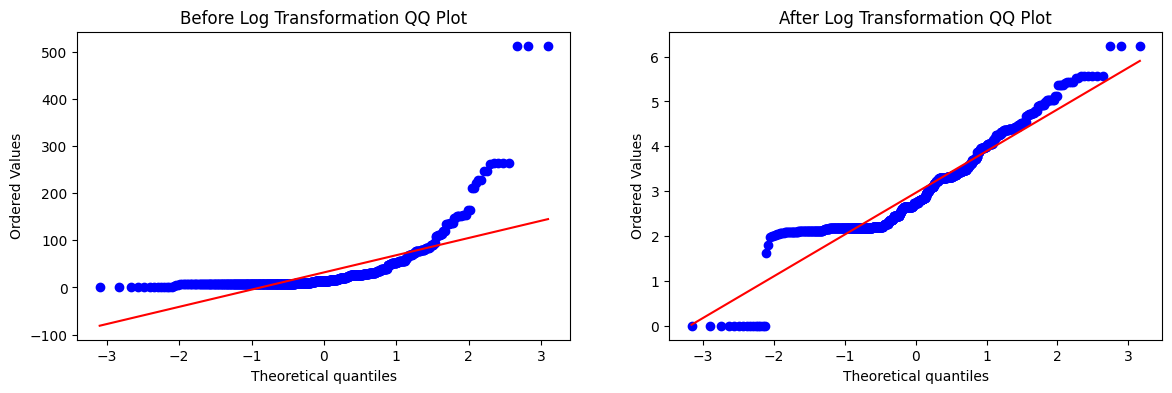

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'], dist = 'norm', plot =plt)
plt.title('Before Log Transformation QQ Plot')

plt.subplot(122)
stats.probplot(x_transformed['Fare'], dist = 'norm', plot =plt)
plt.title('After Log Transformation QQ Plot')
plt.show()

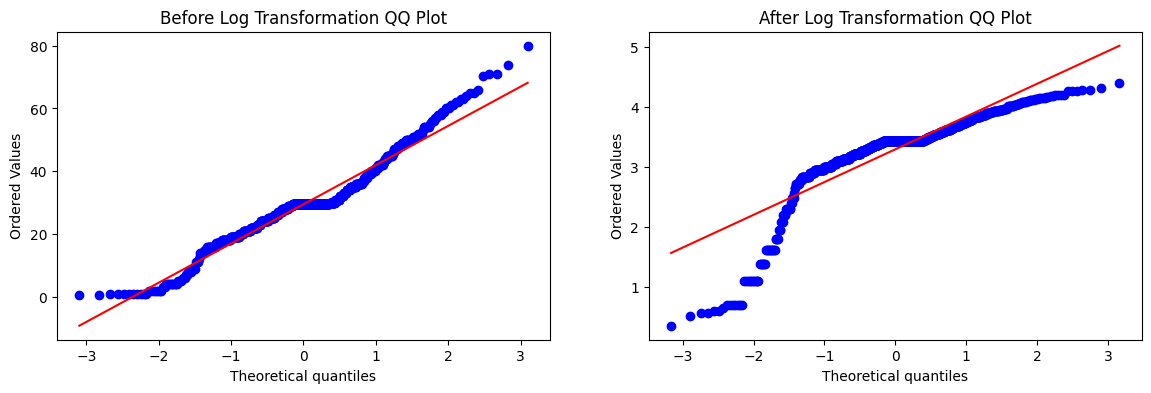

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(x_train['Age'], dist = 'norm', plot =plt)
plt.title('Before Log Transformation QQ Plot')

plt.subplot(122)
stats.probplot(x_transformed['Age'], dist = 'norm', plot =plt)
plt.title('After Log Transformation QQ Plot')
plt.show()

In [ ]:
# After applying transformation to Age : it got worse whereas, Fare: has seen improvements

# Reason : It happened as generally log is applkied to right skewed data,
# which in this case Age wasn't, hence can be confirmed

#### Appling Log transformation to just `Fare` Column

In [ ]:
x_train.shape

(712, 2)

In [ ]:
tnf0 = ColumnTransformer([('logtnf', FunctionTransformer(func = np.log1p), [1] )], remainder='passthrough')

In [ ]:
x_train_transformed = tnf0.fit_transform(x_train)
x_test_transformed = tnf0.transform(x_test)

In [ ]:
meow = pd.DataFrame(x_train_transformed)
meow.head()

,0,1
0,3.295837,29.000000
1,2.085672,29.699118
2,2.585883,33.000000
3,2.085672,25.000000
4,4.500967,49.000000


In [ ]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(x_train_transformed, y_train)
clf1.fit(x_train_transformed,y_train)

ypred = clf.predict(x_test_transformed)
ypred1 = clf1.predict(x_test_transformed)

print(f'Accuracy LR', accuracy_score(y_test, ypred))
print(f'Accuracy DT', accuracy_score(y_test, ypred1))

Accuracy LR 0.6983240223463687
Accuracy DT 0.6480446927374302


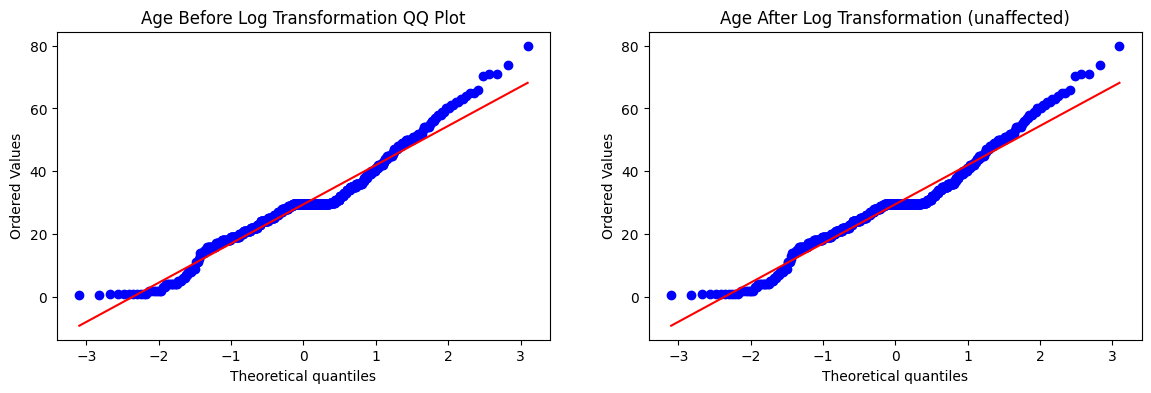

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(x_train['Age'], dist = 'norm', plot =plt)
plt.title('Age Before Log Transformation QQ Plot')

plt.subplot(122)
stats.probplot(meow[1], dist = 'norm', plot =plt)
plt.title('Age After Log Transformation (unaffected)')
plt.show()

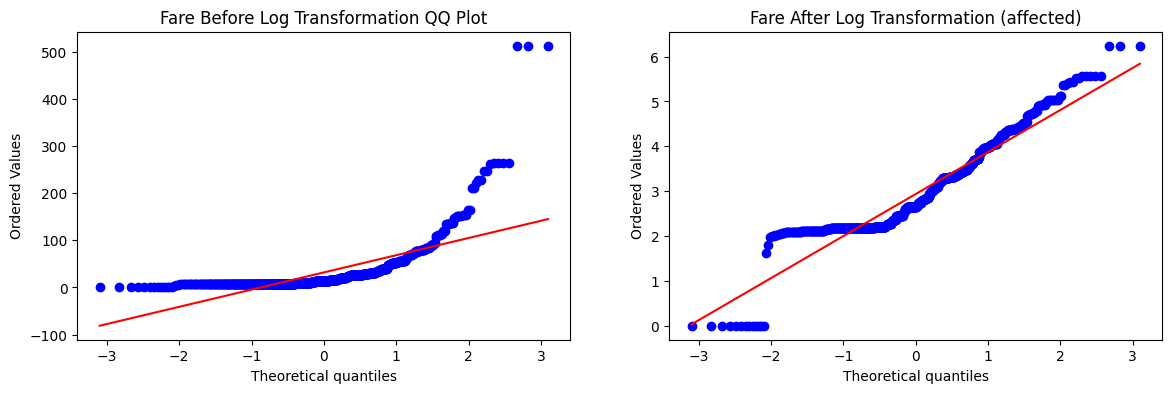

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'], dist = 'norm', plot =plt)
plt.title('Fare Before Log Transformation QQ Plot')

plt.subplot(122)
stats.probplot(meow[0], dist = 'norm', plot =plt)
plt.title('Fare After Log Transformation (affected)')
plt.show()

In [ ]:
# Just to check we can now apply `cross_val_score(on x_train_transformed)`

In [ ]:
x_transformed = tnf0.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf, x_transformed, Y, scoring = 'accuracy', cv =10)))
print('LR',np.mean(cross_val_score(clf1, x_transformed, Y, scoring = 'accuracy', cv =10)))

LR 0.6712609238451936
LR 0.6610611735330837


#### Applying Other Transformers

In [ ]:
def apply_transform(transform):
  X = df.iloc[:,[5,9]]
  Y = df.iloc[:,1]

  tnf = ColumnTransformer([
      ('transform', FunctionTransformer(func = transform), ['Fare'])
  ],remainder = 'passthrough')

  x_transform = tnf.fit_transform(X)

  clf = LogisticRegression()
  print('LR Accuracy',np.mean(cross_val_score(clf, x_transform, Y, scoring = 'accuracy', cv =10)))

  plt.figure(figsize = (14,4))

  plt.subplot(121)
  stats.probplot(X['Fare'], dist = 'norm', plot = plt)
  plt.title('Fare before Transformation')

  plt.subplot(122)
  stats.probplot(x_transform[:,0], dist = 'norm', plot = plt)
  plt.title(f'Fare after {transform} Transformation')

  plt.show()



LR Accuracy 0.61729088639201


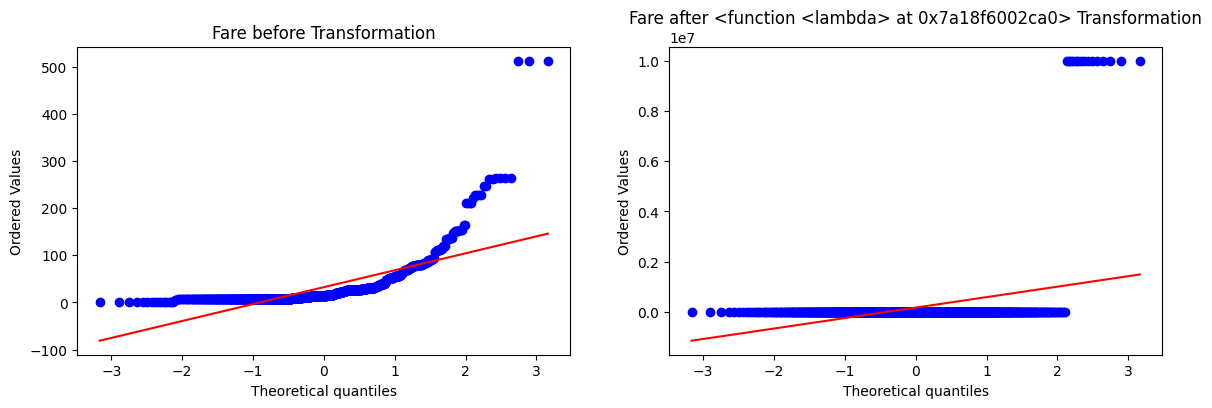

In [ ]:
apply_transform(lambda a: 1/(a+0.0000001))

## Power Transformer

In [4]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("hamzakhurshed/concrete-strength-dataset")

print(os.listdir(path))

Using Colab cache for faster access to the 'concrete-strength-dataset' dataset.
['concrete_data.csv', '.nfs0000000082f1c8fa0000011d']


In [5]:
df = pd.read_csv(os.path.join(path,'concrete_data.csv'))

In [6]:
 df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1002,321.3,164.2,0.0,190.5,4.6,870.0,774.0,28,57.22
904,155.0,183.0,0.0,193.0,9.0,877.0,868.0,28,23.79
633,275.0,0.0,0.0,183.0,0.0,1088.0,808.0,7,14.20
550,393.0,0.0,0.0,192.0,0.0,940.6,785.6,7,27.74
753,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,28,67.31


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [8]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
# minimum in some features is zero 0 , which is not suitable
# for box-cox thereby we'll add 0.00001 something

In [11]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state =42)

### Box-Cox Transformer

In [28]:
lr = LinearRegression()
lr.fit(x_train, y_train)
ypred = lr.predict(x_test)
r2_score(y_test, ypred)

0.627553179231485

In [24]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_transformed = sc.fit_transform(x)

In [29]:
print(f'LR R2 Score: {np.mean(cross_val_score(lr, x,y, scoring = 'r2', cv =10))}')

LR R2 Score: 0.27820729160873814


/tmp/ipython-input-1195170764.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


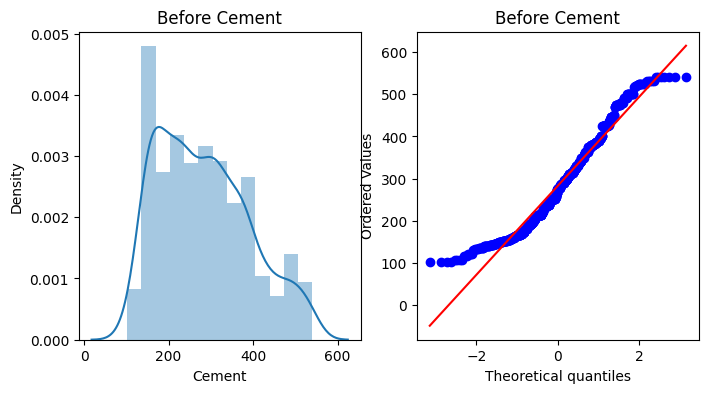

/tmp/ipython-input-1195170764.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


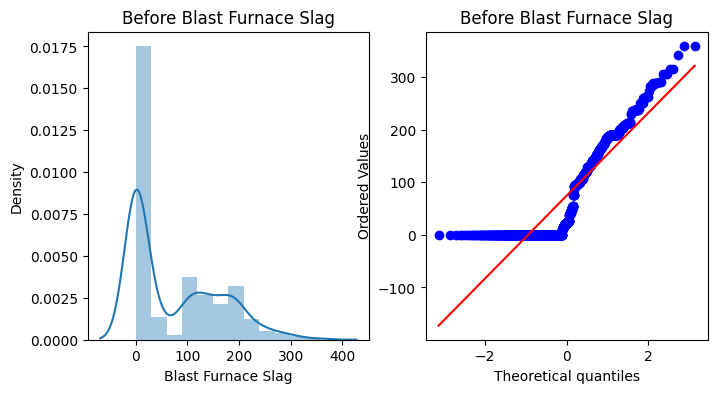

/tmp/ipython-input-1195170764.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


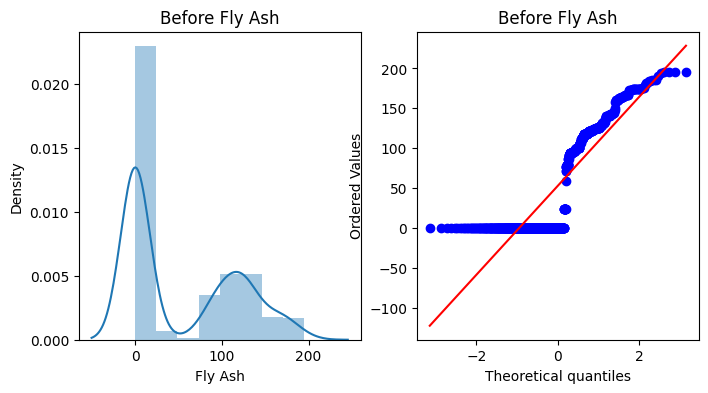

/tmp/ipython-input-1195170764.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


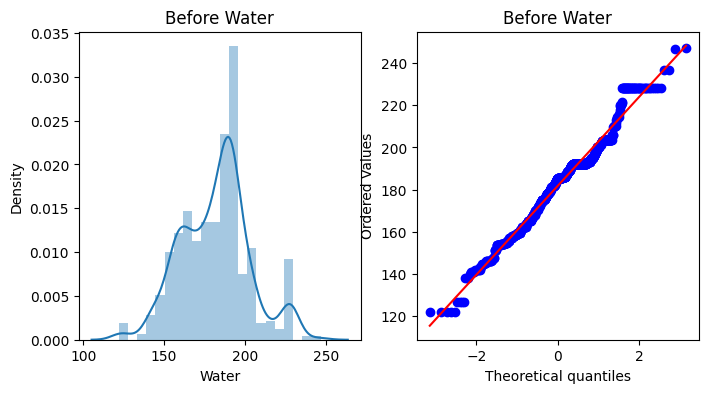

/tmp/ipython-input-1195170764.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


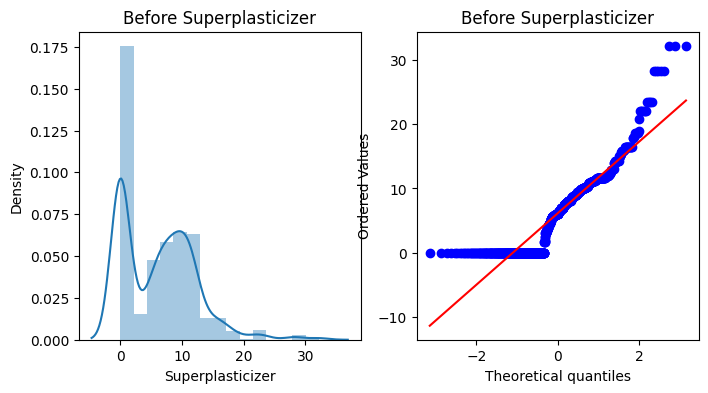

/tmp/ipython-input-1195170764.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


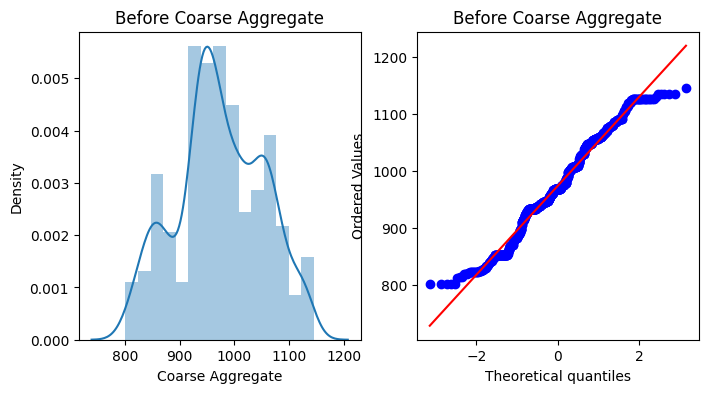

/tmp/ipython-input-1195170764.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


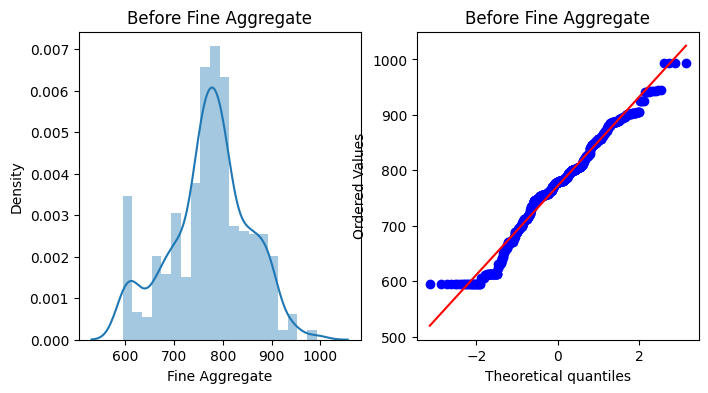

/tmp/ipython-input-1195170764.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


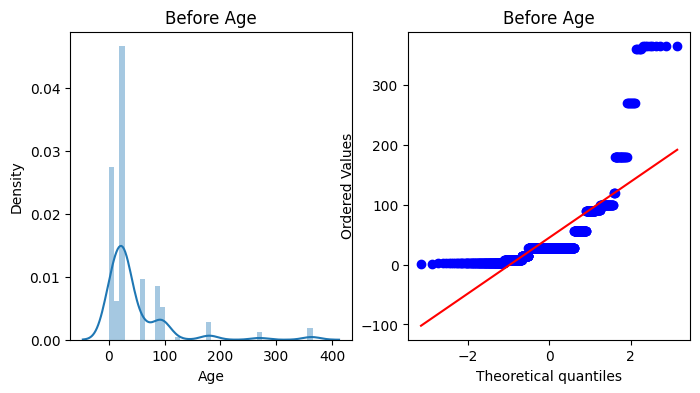

In [30]:
for col in x_train.columns:
  plt.figure(figsize=(8,4))
  plt.subplot(121)
  sns.distplot(x_train[col])
  plt.title(f'Before {col}')

  plt.subplot(122)
  stats.probplot(x_train[col],dist='norm',plot=plt)
  plt.title(f'Before {col}')

  plt.show()

In [33]:
bcpt = PowerTransformer(method = 'box-cox')
x_train_transformed = bcpt.fit_transform(x_train +0.000001)
x_test_transformed = bcpt.transform(x_test+0.000001)
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':bcpt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [34]:
lr = LinearRegression()
lr.fit(x_train_transformed, y_train)
ypred = lr.predict(x_test_transformed)
r2_score(y_test, ypred)

0.8047824993083206

In [36]:
x_transformed = bcpt.fit_transform(x+0.000001)
print(f'LR R2 Score: {np.mean(cross_val_score(lr, x_transformed,y, scoring = 'r2', cv =10))}')

LR R2 Score: 0.6466764733926945


/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


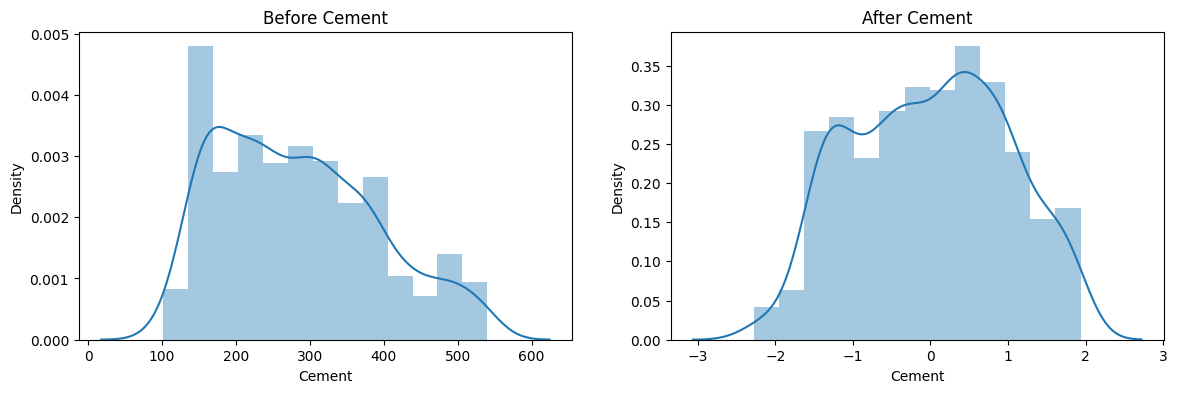

/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


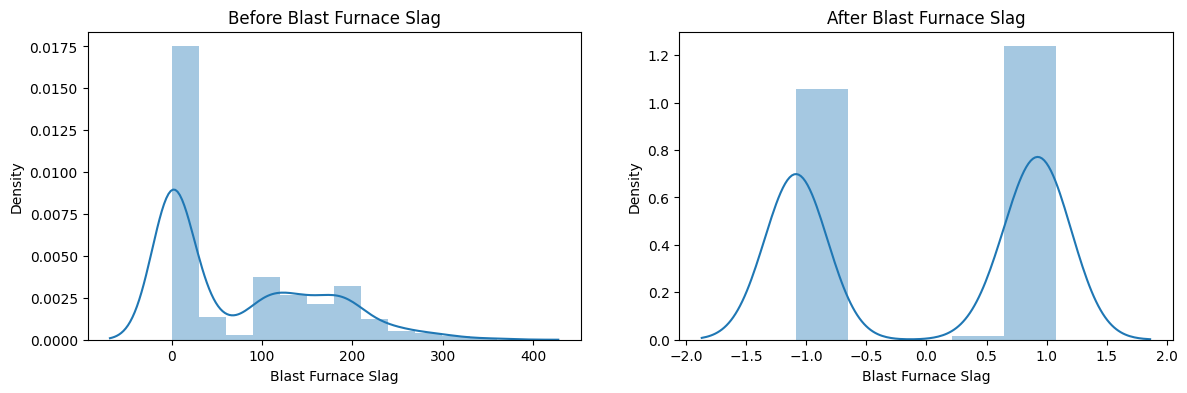

/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


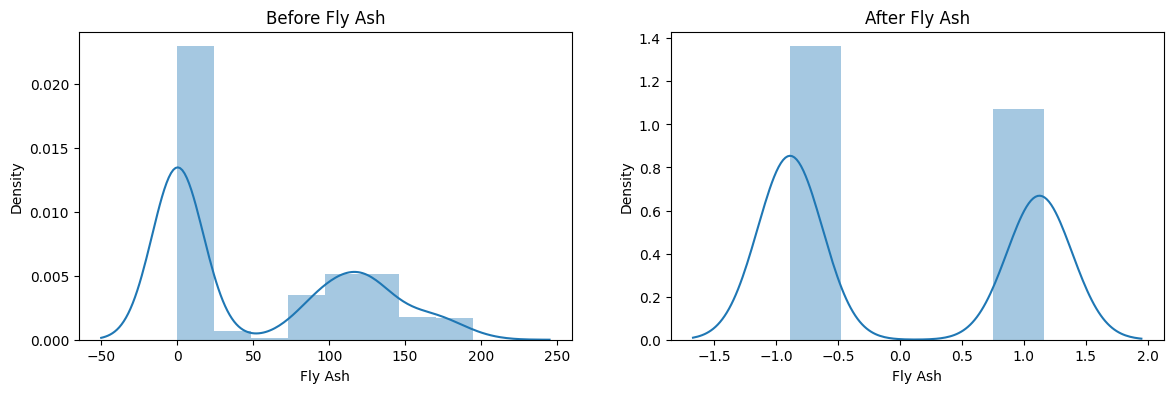

/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


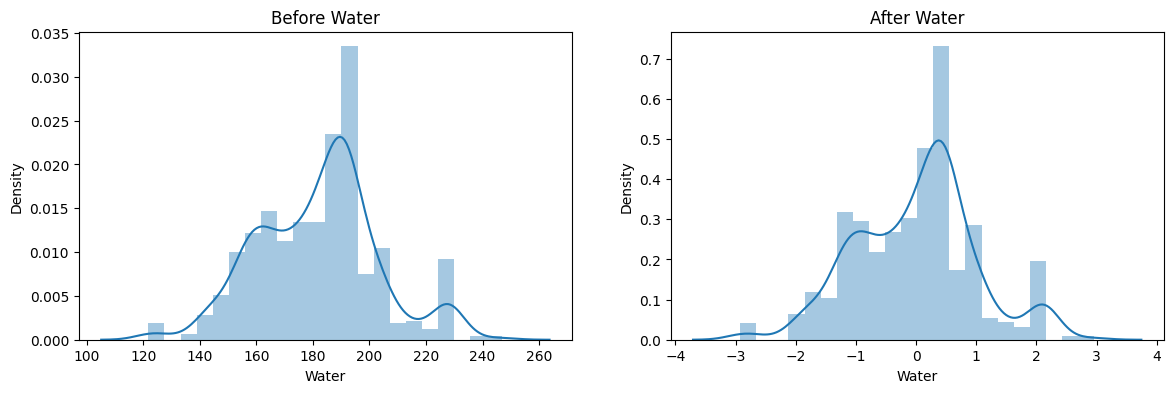

/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


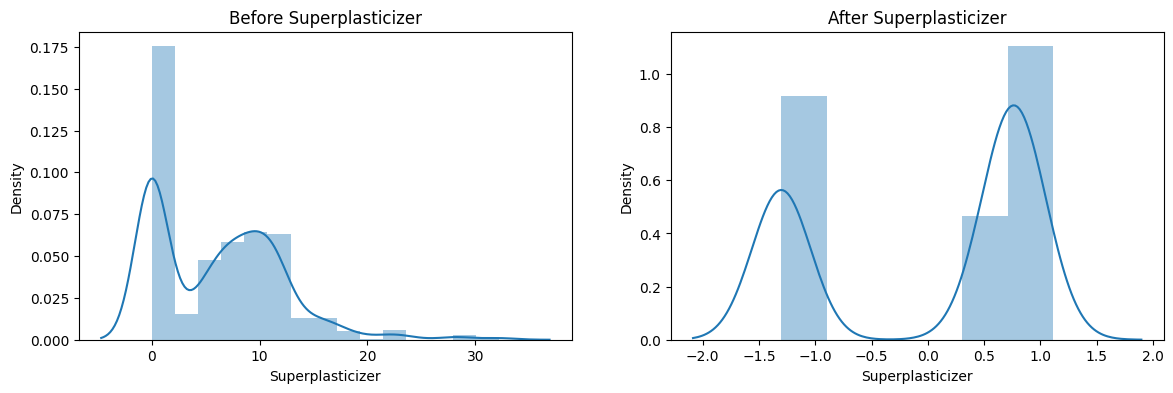

/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


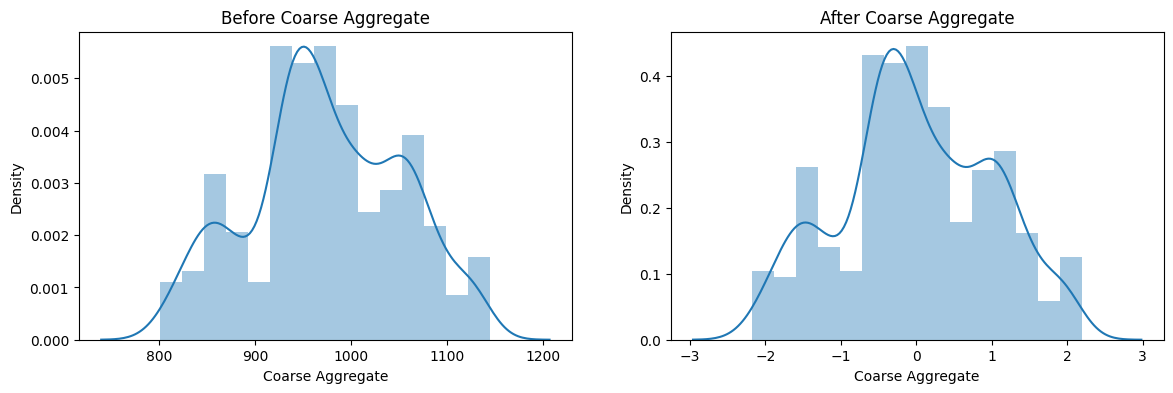

/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


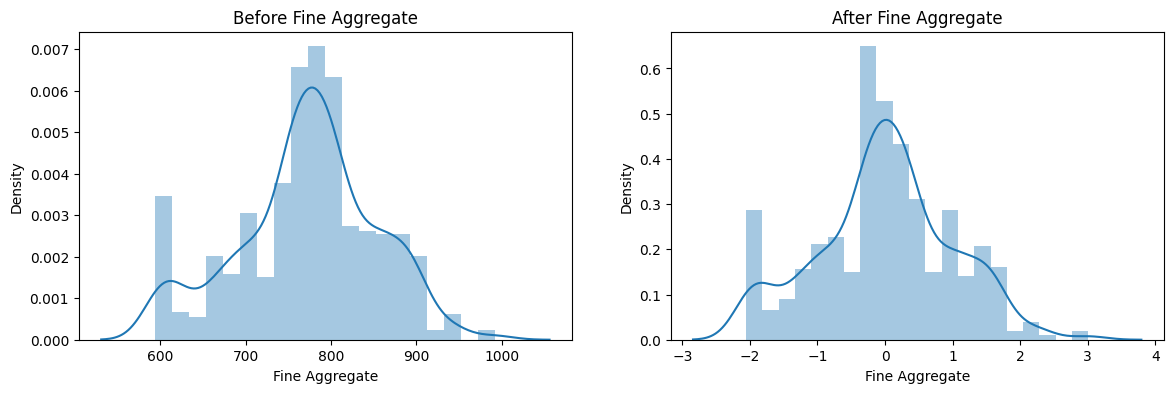

/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


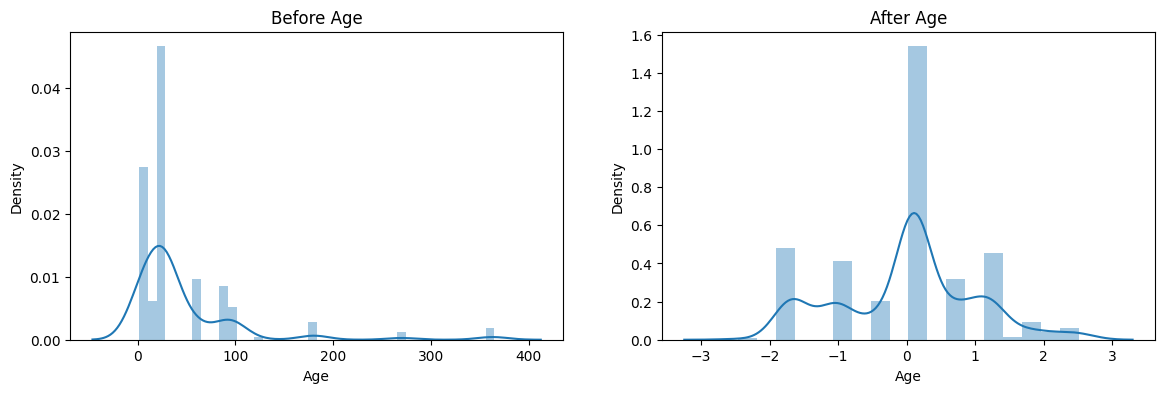

In [43]:
x_train_transformed0 = pd.DataFrame(x_train_transformed,columns=x_train.columns)

for col in x_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(x_train[col])
  plt.title(f'Before {col}')

  plt.subplot(122)
  sns.distplot(x_train_transformed0[col])
  plt.title(f'After {col}')

  plt.show()

### Yeo-Johnson Transformer

In [51]:
yjpt = PowerTransformer()
x_train_transformed1 = yjpt.fit_transform(x_train)
x_test_transformed1 = yjpt.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_transformed1,y_train)
y_pred = lr.predict(x_test_transformed1)
print(f'LR R2 Score: {r2_score(y_test,y_pred)}')
pd.DataFrame({'cols':x_train.columns,'Yeo_Johnson_lambdas':yjpt.lambdas_})

LR R2 Score: 0.8161906512004999


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [49]:
x_transformed = yjpt.fit_transform(x)
print(f'LR R2 Score: {np.mean(cross_val_score(lr, x_transformed,y, scoring = 'r2'))}')

LR R2 Score: 0.6834625141500866


/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


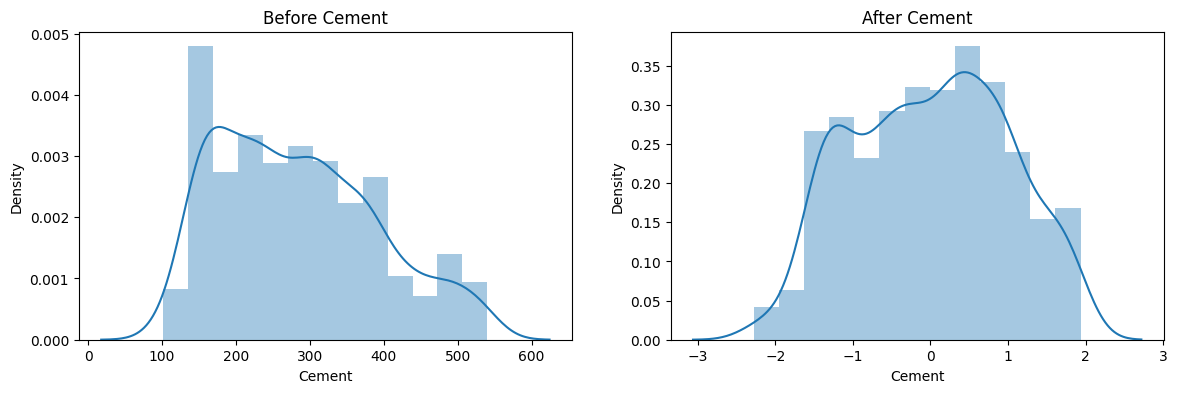

/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


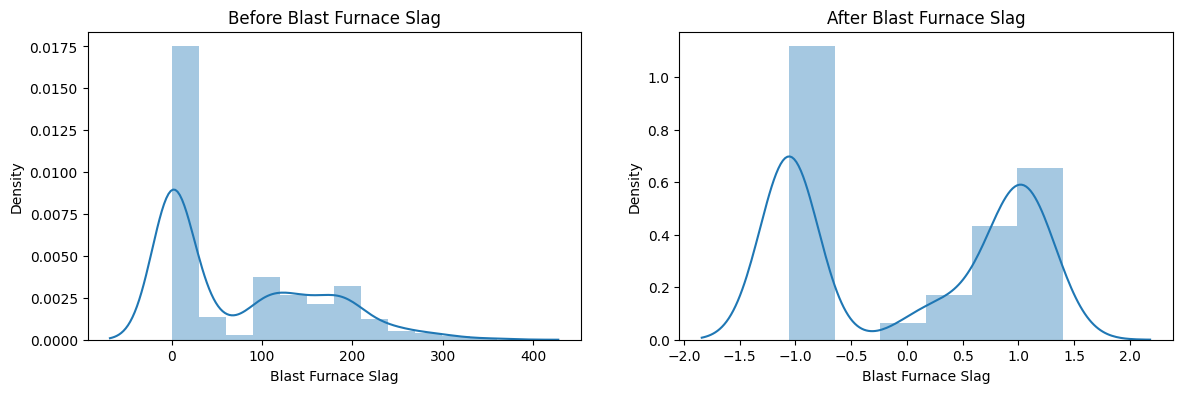

/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


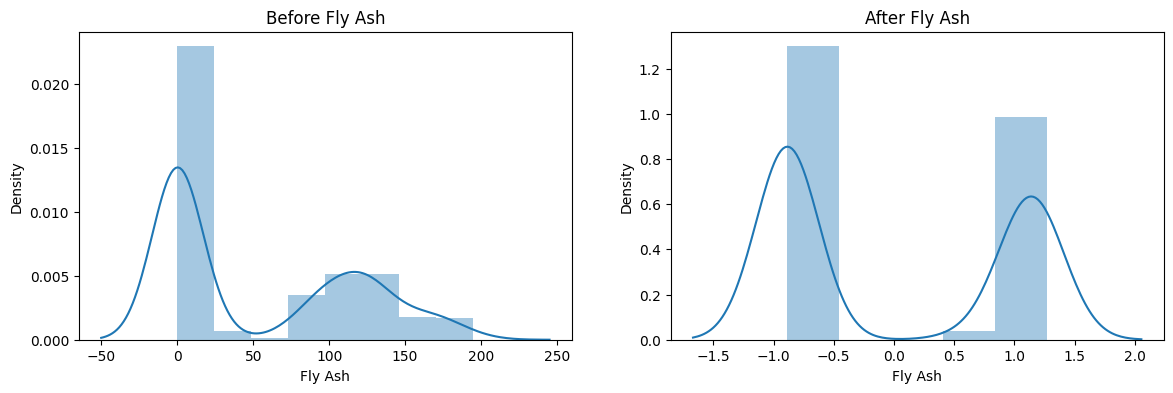

/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


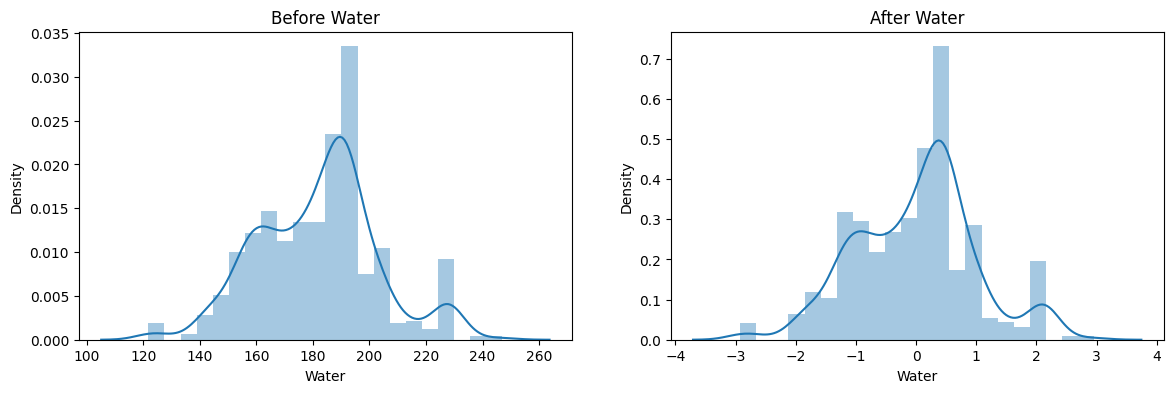

/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


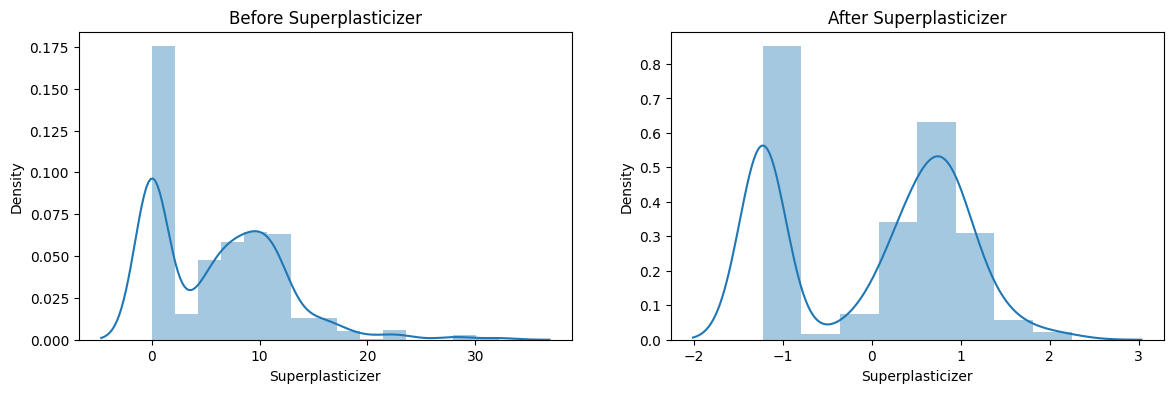

/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


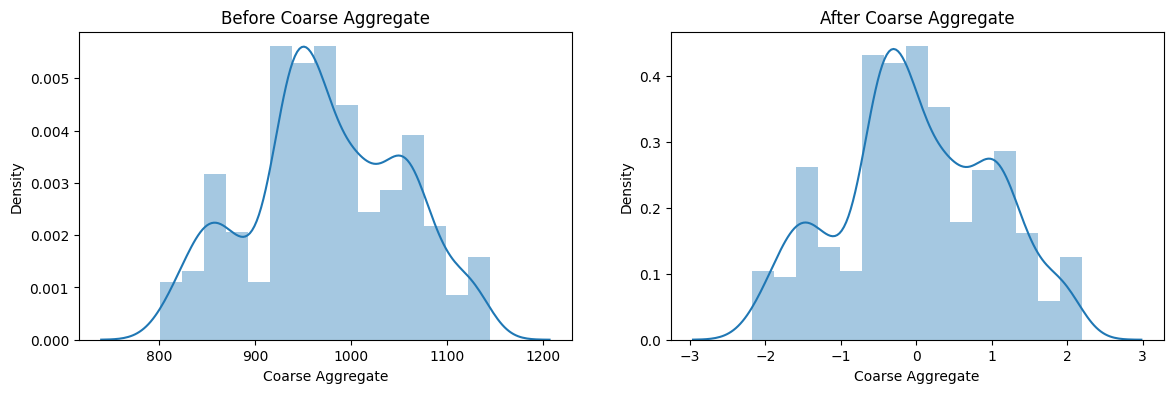

/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


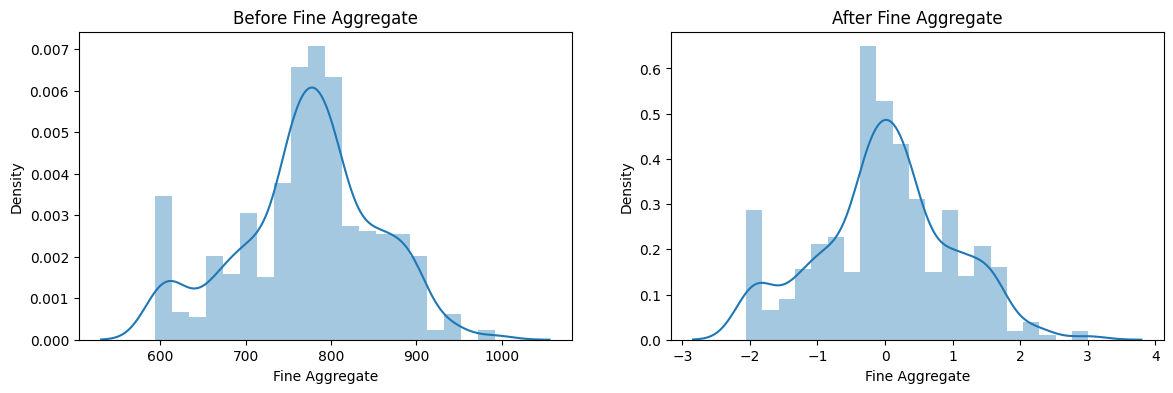

/tmp/ipython-input-3439041003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/tmp/ipython-input-3439041003.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed0[col])


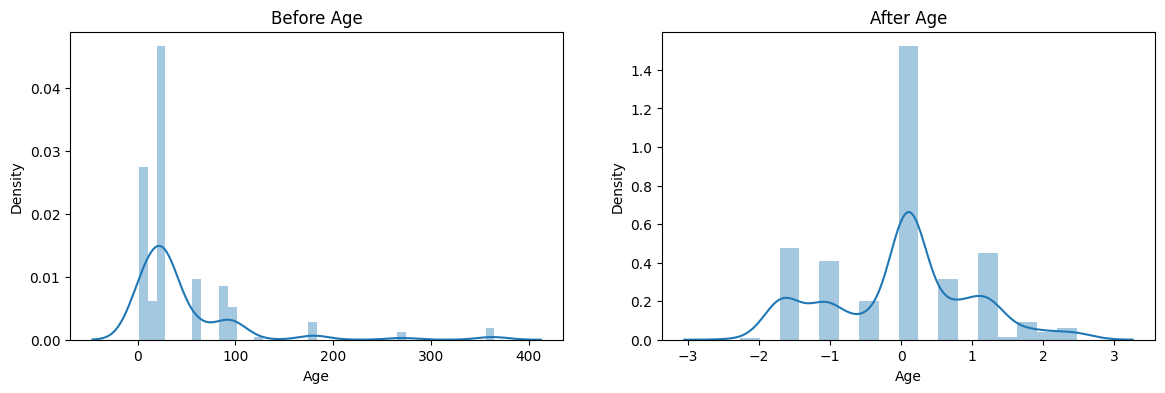

In [50]:
x_train_transformed0 = pd.DataFrame(x_train_transformed,columns=x_train.columns)

for col in x_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(x_train[col])
  plt.title(f'Before {col}')

  plt.subplot(122)
  sns.distplot(x_train_transformed0[col])
  plt.title(f'After {col}')

  plt.show()

In [53]:
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':bcpt.lambdas_, 'yeo_johnson_lambdas':yjpt.lambdas_})

,cols,box_cox_lambdas,yeo_johnson_lambdas
0,Cement,0.172271,0.174348
1,Blast Furnace Slag,0.025273,0.015715
2,Fly Ash,-0.032412,-0.161447
3,Water,0.809568,0.771307
4,Superplasticizer,0.099711,0.253935
5,Coarse Aggregate,1.129168,1.130050
6,Fine Aggregate,1.829625,1.783100
7,Age,0.048975,0.019885
